In [1]:
from EpidemiologicalModels.CompartmentalModelsInEDOS import *

# Parámetros del modelo
beta =  0.5 # Tasa de contagio
alpha =  0.2 # Tasa de recuperación (días que dura en promedio la enfermedad)
mu = 1/(75*365) # Tasa de natalidad / mortalidad
theta = 0.4 # 0.1 # Tasa de muerte por enfermedad

# Funciones del modelo
def S_function(values, beta = beta, mu = mu, theta = theta):
    # S' = mu - theta*alpha*I + alpha*I - mu*S - beta*S*I
    # S' = mu*(1 - S) + (1 - theta)*alpha*I - beta*S*I
    return mu*(1 - values[0]) + (1 - theta)*alpha*values[1] - beta*values[0]*values[1]

def I_function(values, alpha = alpha, beta = beta, mu = mu, theta = theta):
    # I' = beta*S*I - alpha*I - mu*I + theta*alpha*I
    # I' = beta*S*I - (1 - theta)*alpha*I - mu*I
    return beta*values[0]*values[1] - (1 - theta)*alpha*values[1] - mu*values[1]

listOfFunctions = [S_function, I_function]
initialValues = [0.9, 0.1]

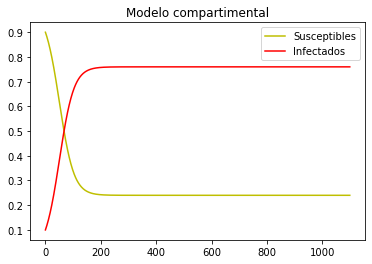

In [2]:
# Solución discreta del modelo
discreteSolutions = CompartmentalModelsInEDOS(listOfFunctions, initialValues)
discreteSolutions.n_iterations(1100)
# discreteSolutions.ModelSolutions()
discreteSolutions.plotSolutions(["Susceptibles", "Infectados"],["y","r"])
# discreteSolutions.PrintParameters()

In [3]:
# Parámetros del modelo
beta =  0.5 # Tasa de contagio
alpha =  0.2 # Tasa de recuperación (días que dura en promedio la enfermedad)

# Funciones del modelo
def S_function(values, beta=beta, mu = mu, theta = theta):
    # S' = -beta*S*I + mu*(1 - S) + theta*alpha*I
    return mu*(1 - values[0]) - beta*values[0]*values[1] + alpha*theta*values[1]

def I_function(values, alpha=alpha, beta=beta, mu = mu, theta = theta):
    # I' = beta*S*I - mu*I - theta*alpha*I - (1 - theta)*alpha*I 
    # I' = beta*S*I - mu*I - alpha*I
    return beta*values[0]*values[1] - values[1]*(alpha + mu)

def R_function(values, alpha=alpha, mu = mu, theta = theta):
    # R' = (1 - theta)*alpha*I - mu*R
    return (1 - theta)*alpha*values[1] 

listOfFunctions = [S_function, I_function, R_function]
initialValues = [0.9, 0.1, 0]

In [4]:
# Solución discreta del modelo
discreteSolutions = CompartmentalModelsInEDOS(listOfFunctions, initialValues)
discreteSolutions.n_iterations(1100)
# discreteSolutions.ModelSolutions()
discreteSolutions.PrintParameters()

h: 0.1 
n_iterations: 1100 
differentialEquations: [<function S_function at 0x000002061088AD30>, <function I_function at 0x0000020612ACCDC0>, <function R_function at 0x0000020612ACCE50>]
        


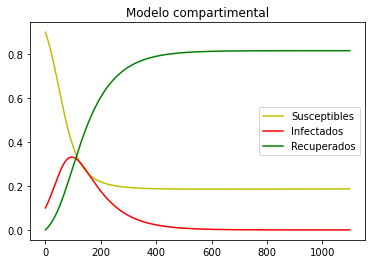

In [5]:
discreteSolutions.plotSolutions(["Susceptibles", "Infectados", "Recuperados"],["y", "r", "g"])